@author: Carlos Andrés Tejada Ramírez  
Point 4 of Homework 1 from statistics III

# Data Exploration AND PCA (Point 4)

## Use this data from cars to do the following tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [42]:
df = pd.read_csv("../Docs/Data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\\$,]', '', regex=True).astype(float)

'Model' and 'MSRP' variables are excluded because they have too many different values or unique values

## 1. Distribution of each variable

In [45]:
categoricalVariables = df.select_dtypes(include='object').drop(columns=['Model', 'MSRP'])
numericVariables = df.select_dtypes(include=['int64', 'float64'])

# 1.1. For categorical variables a bar graph. Category number of observations.

In [4]:
def graphBarChart(column):
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

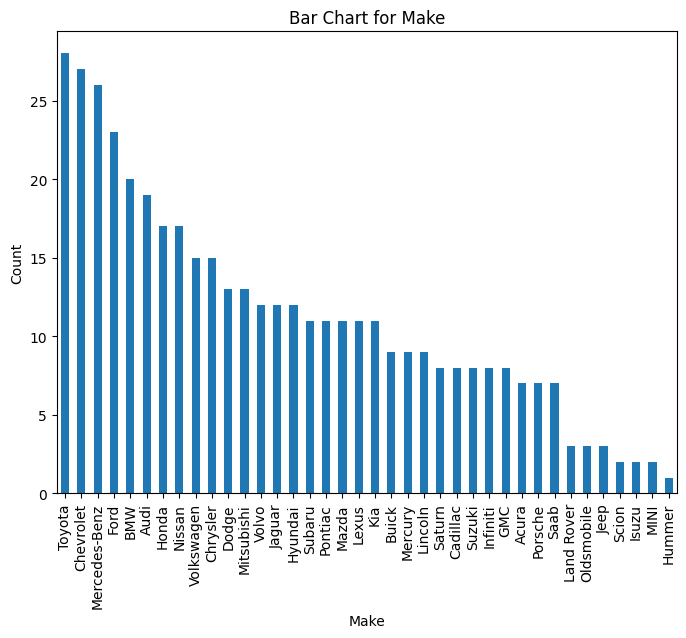

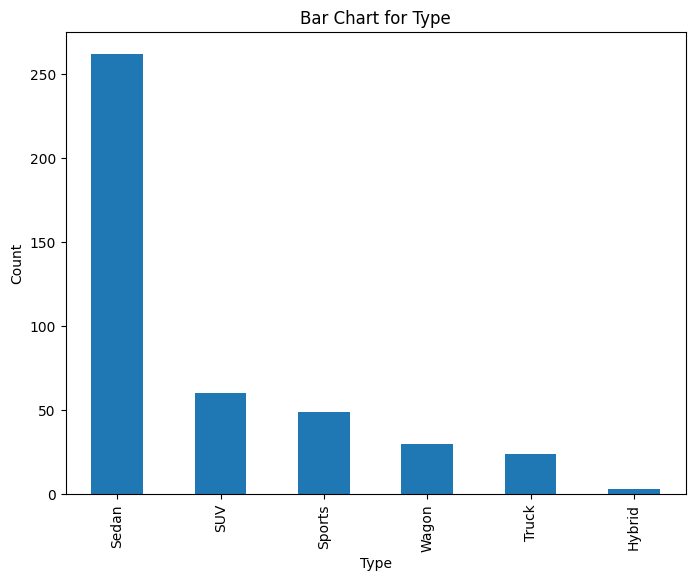

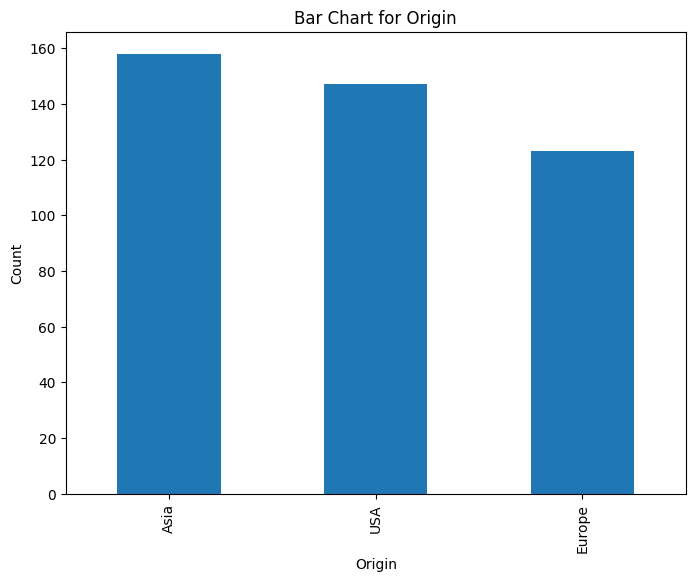

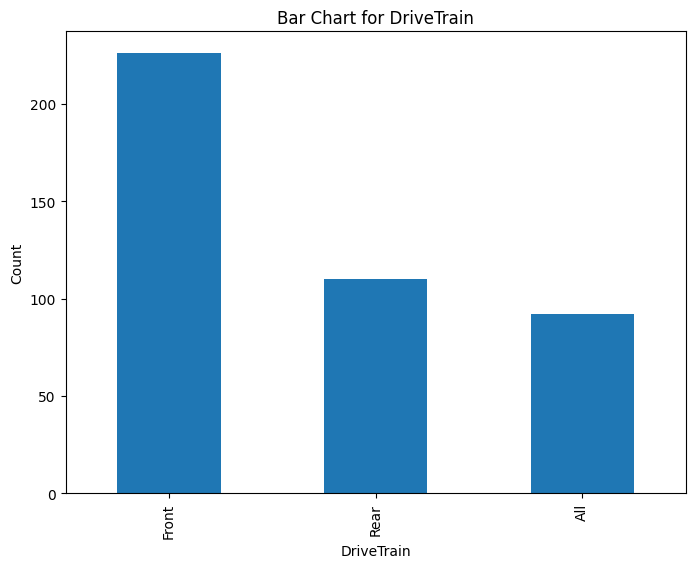

In [5]:
for column in categoricalVariables.columns:
    graphBarChart(column)

## For numerical variables create histograms. List the car models that are further away from 5 deviation standards, and would be considered outliers. Test if it is a distribution normal or not.

### Histograms

In [6]:
def graphHistogram(numericVariables):
    for column in numericVariables.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20)
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

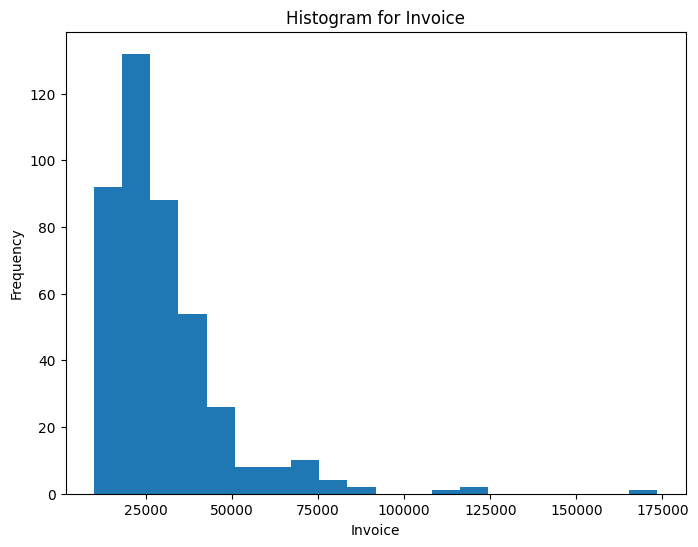

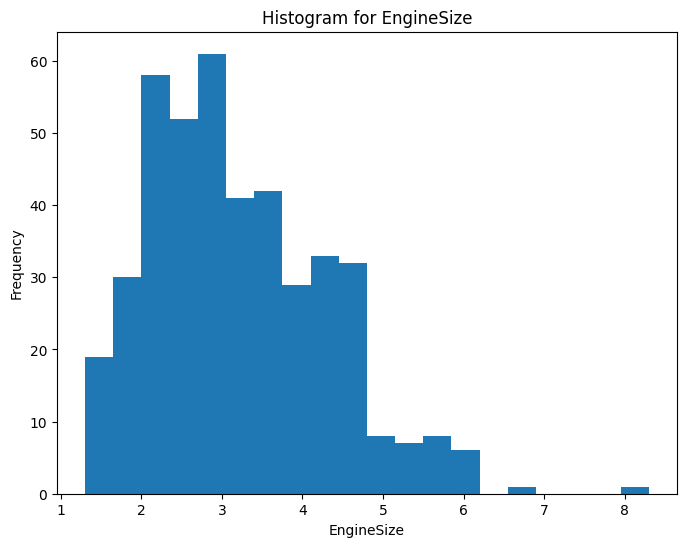

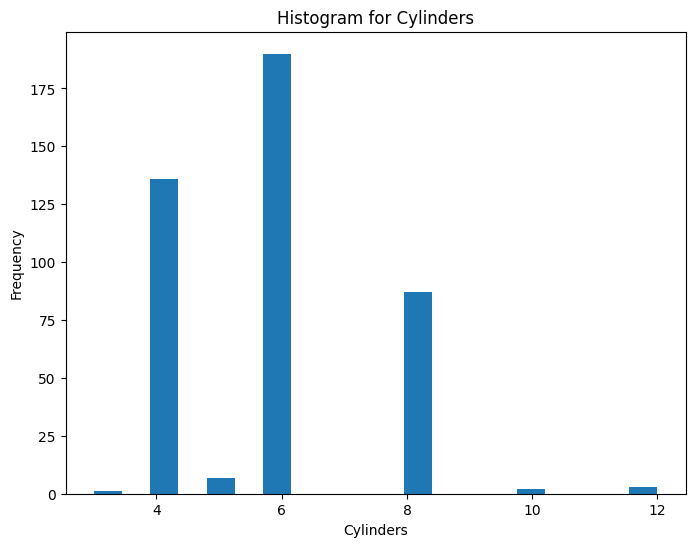

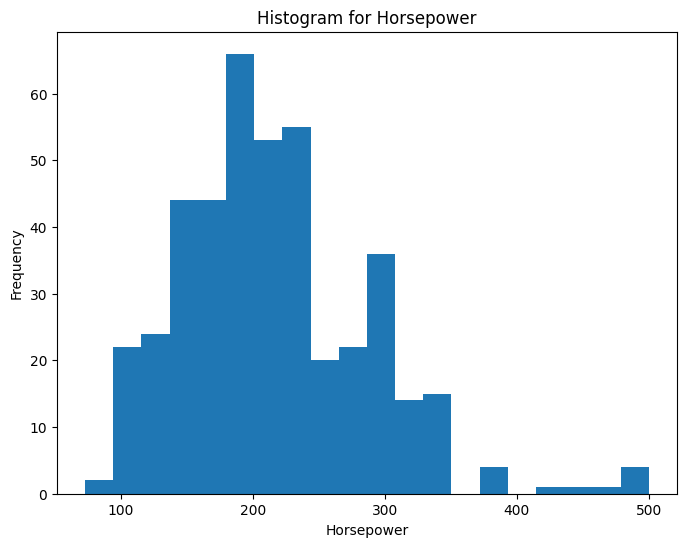

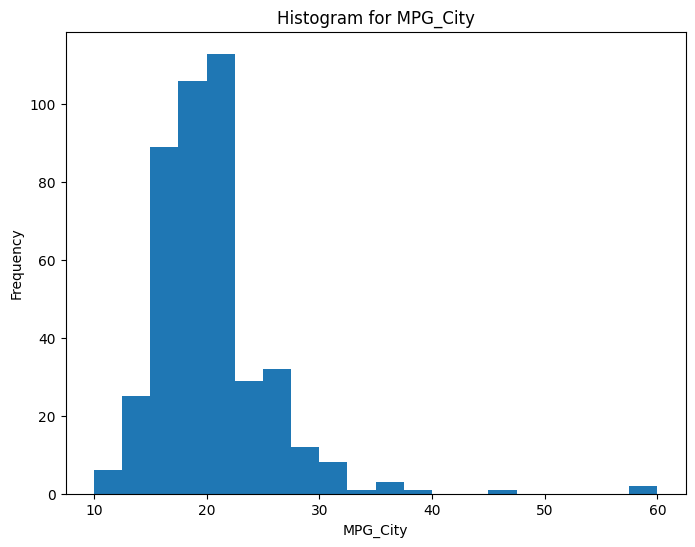

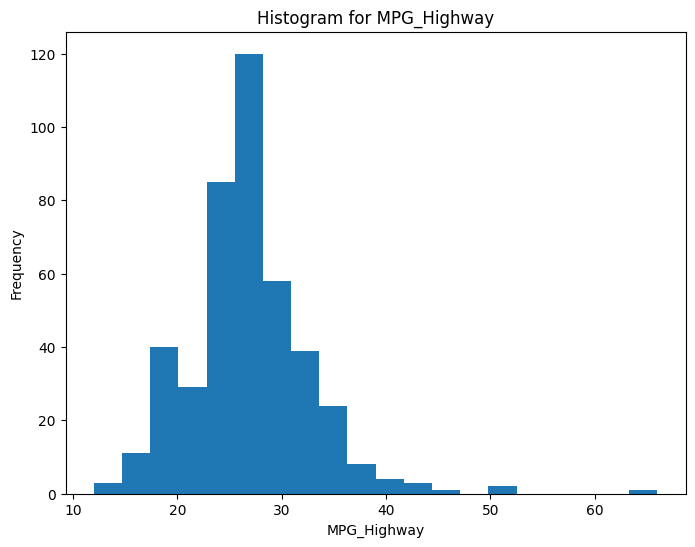

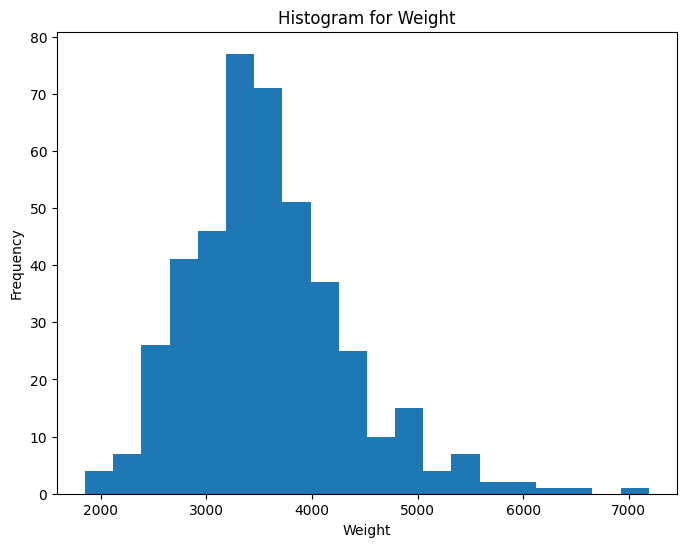

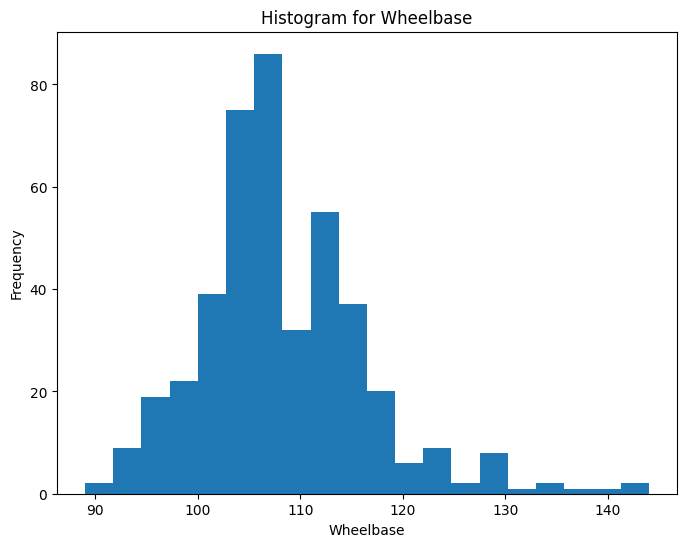

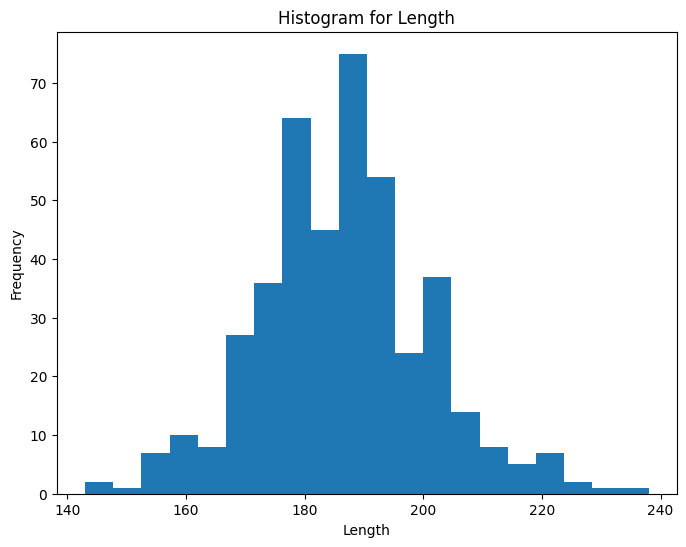

In [7]:
graphHistogram(numericVariables)

### Outliers

In [8]:
def scaleData(df, column):
    return (df[column] - df[column].mean()) / df[column].std()

In [9]:
def findOutliers(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        mean = np.mean(df[column])
        std_dev = np.std(df[column])
        lower_bound = mean - (5 * std_dev)
        upper_bound = mean + (5 * std_dev)
        outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]], axis=0)
    return outliers.drop_duplicates()

In [10]:
scaledDf = scaleData(df, numericVariables.columns)
findOutliers(scaledDf, numericVariables.columns)

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
262,5.077922,2.077649,3.973511,3.857597,-1.347929,-1.366170,1.179271,0.703312,0.671253
334,8.136512,0.363768,0.123513,3.634868,-0.584311,-0.495272,-0.588884,-1.823213,-0.791347
150,-0.686068,-1.079501,-1.801485,-1.989051,7.624588,6.820271,-2.276669,-1.582592,-2.184299
373,-0.628536,-1.530522,-1.159819,-1.473989,7.433684,4.207577,-0.906414,-0.259174,-0.791347


### Normal tests

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def getNormalityTest(numericVariables):
    results = pd.DataFrame(columns=['Variable', 'Statistical', 'p-value', 'Normal distribution'])

    for column in numericVariables.columns:
        stat, pValue = shapiro(numericVariables[column])
        normalDistribution = pValue > 0.05
        results = results._append({
            'Variable': column,
            'Statistical': stat,
            'P-value': pValue,
            'Normal distribution': 1 if normalDistribution else 0
        }, ignore_index=True)

    return results

In [23]:
print(getNormalityTest(numericVariables))
print(f"\nNormal Distribution:\n\t- 1: It's a normal distribution.\n\t- 0: It isn't a normal distribution")

      Variable  Statistical p-value Normal distribution       P-value
0      Invoice     0.772256     NaN                   0  6.070299e-24
1   EngineSize     0.958561     NaN                   0  1.298519e-09
2    Cylinders          NaN     NaN                   1  1.000000e+00
3   Horsepower     0.949922     NaN                   0  7.410131e-11
4     MPG_City     0.807840     NaN                   0  3.389670e-22
5  MPG_Highway     0.929870     NaN                   0  2.776713e-13
6       Weight     0.958916     NaN                   0  1.472114e-09
7    Wheelbase     0.949997     NaN                   0  7.587275e-11
8       Length     0.991180     NaN                   0  1.183925e-02

Normal Distribution:
	- 1: It's a normal distribution.
	- 0: It isn't a normal distribution


## 2. Graph of the relationship of each variable with respect to MPG_City

### 2.1. Categorical variables you must create a boxplot. Explain how you interpret the graph

In [24]:
import seaborn as sns
selectedVariable = 'MPG_City'

In [25]:
def graphVsBoxplots(variables, selectedVariable):
    for column in variables.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y=selectedVariable, data=df)
        plt.title(f'Boxplot of {selectedVariable} by {column}')
        plt.xlabel(column)
        plt.ylabel(selectedVariable)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

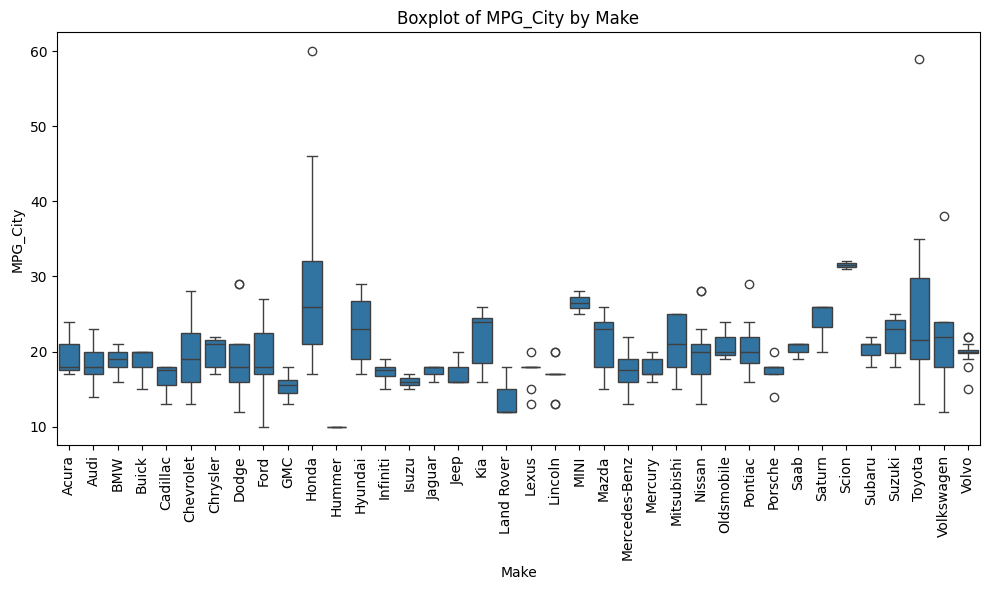

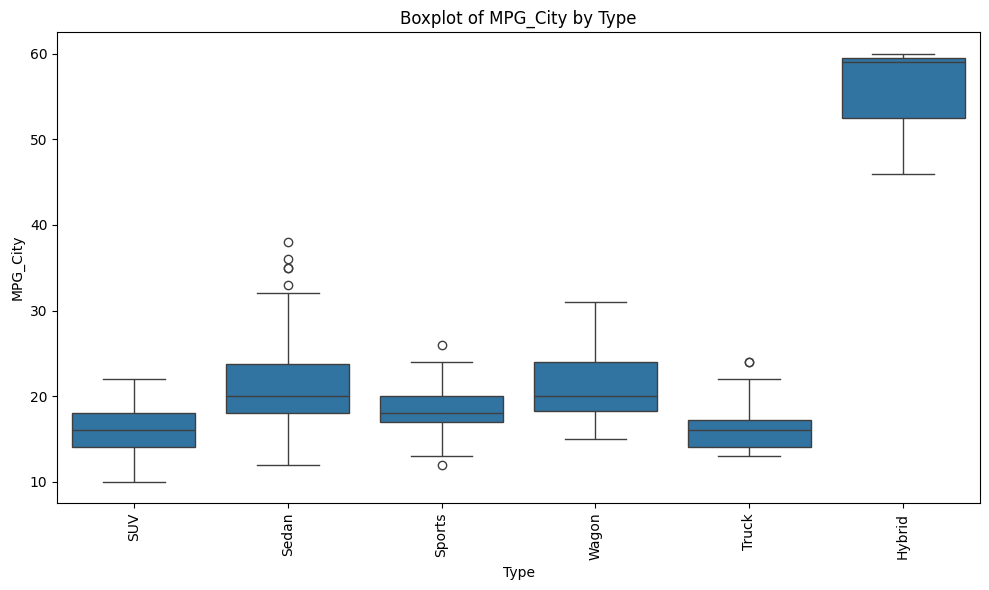

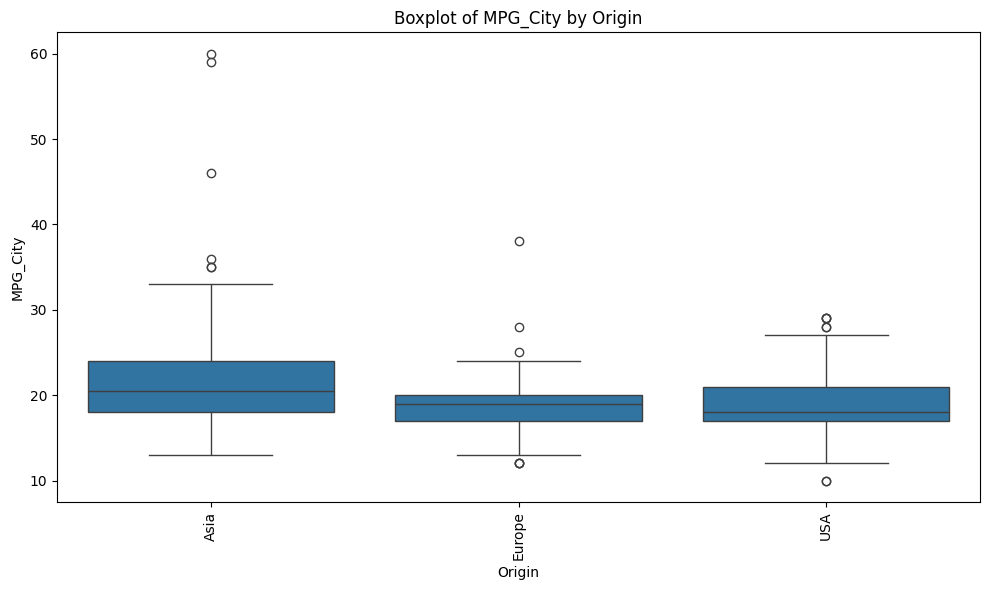

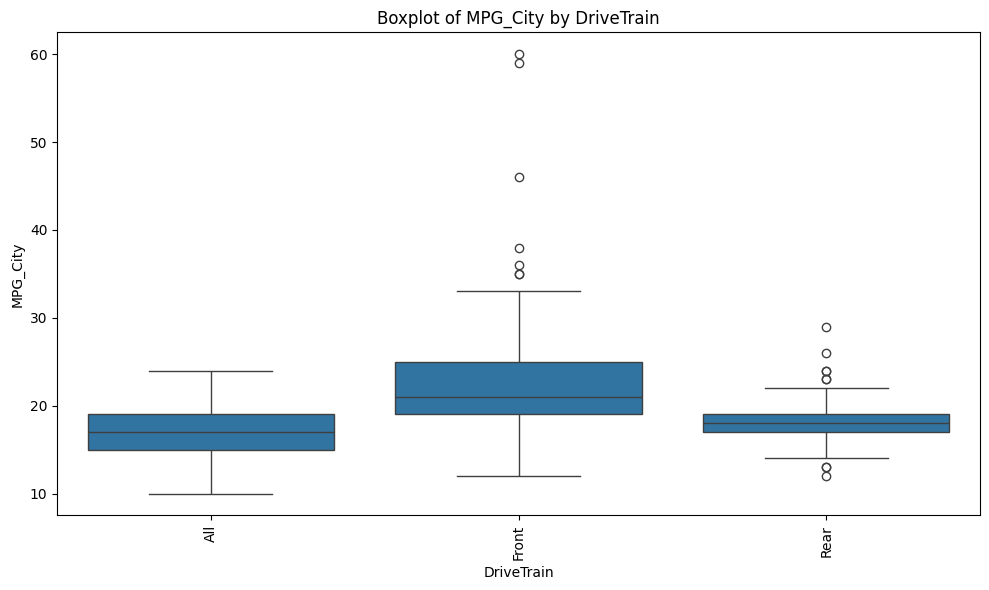

In [26]:
graphVsBoxplots(categoricalVariables, selectedVariable)

### OBSERVATIONS:

#### MPG_City BY make
- Hummer, Lexus, Lincoln, Scion, Volvo have the least data variance
- The highest MPG_City performance is achieved by Toyota and Honda

#### MPG_City BY Type
- Hybrid cars are significantly more efficient in the city
- Sedans have too many upper outliers

#### MPG_City BY Origin
- Cars of Asian origin have the best MPG City performance and the greatest number of outliers

#### MPG_City BY DriveTrain
- The all drivetrain is the variable with the fewest outliers
- The front drivetrain has the best MPG_city performance, and also has the greatest number of outliers


### 2.2. For numerical variables you are going to create a scatter plot. Explain how you interpret the graph

In [27]:
def graphScatter(variables, selectedVariable):
    for variable in variables:
        if variable != selectedVariable:
            plt.figure(figsize=(8, 6))
            plt.scatter(numericVariables[selectedVariable], numericVariables[variable], alpha=0.5)
            plt.title(f'Relation between {variable} AND {selectedVariable}')
            plt.xlabel(selectedVariable)
            plt.ylabel(variable)
            plt.grid(True)
            plt.show()

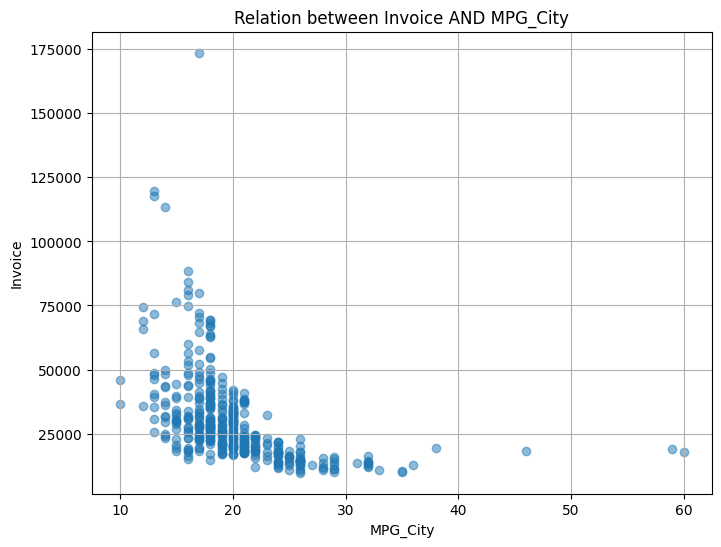

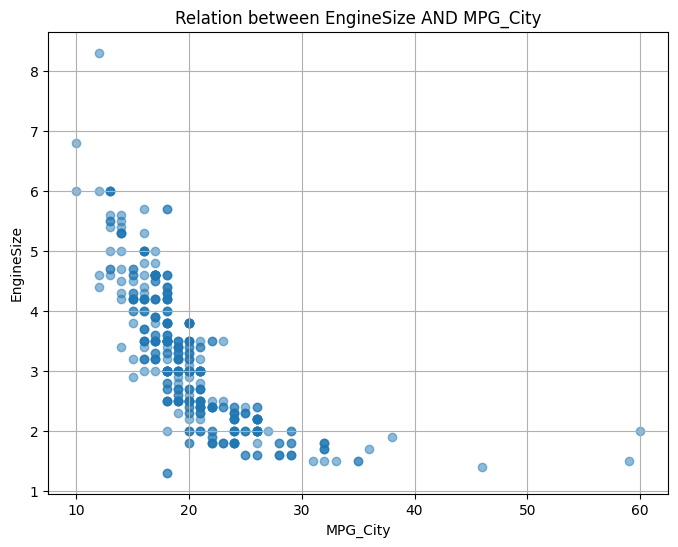

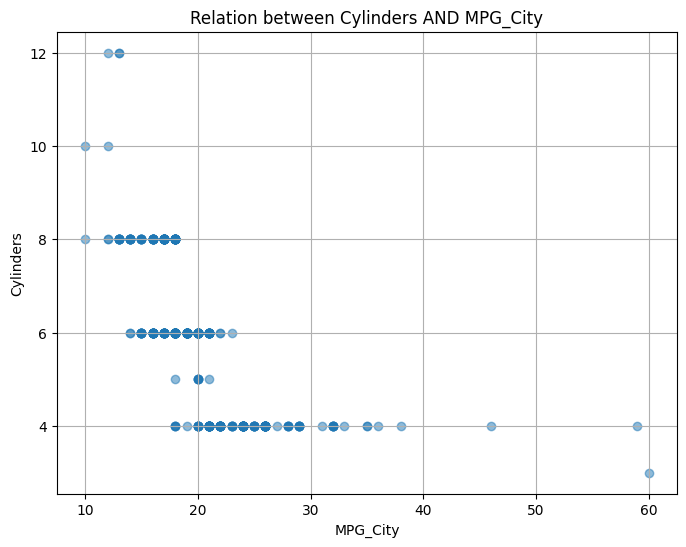

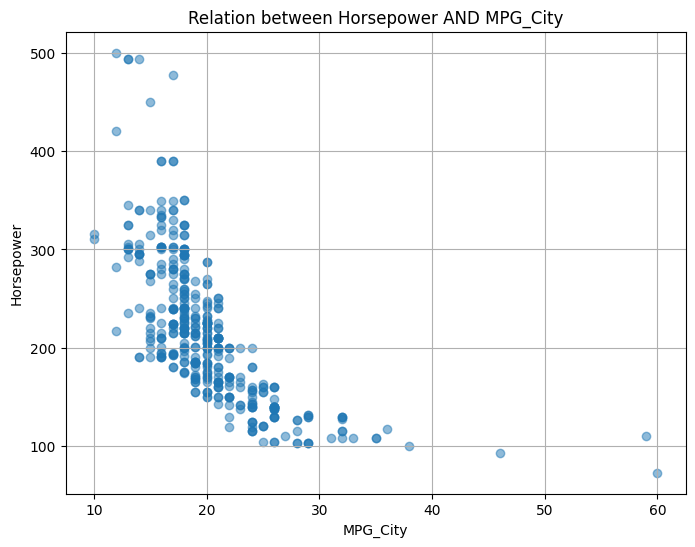

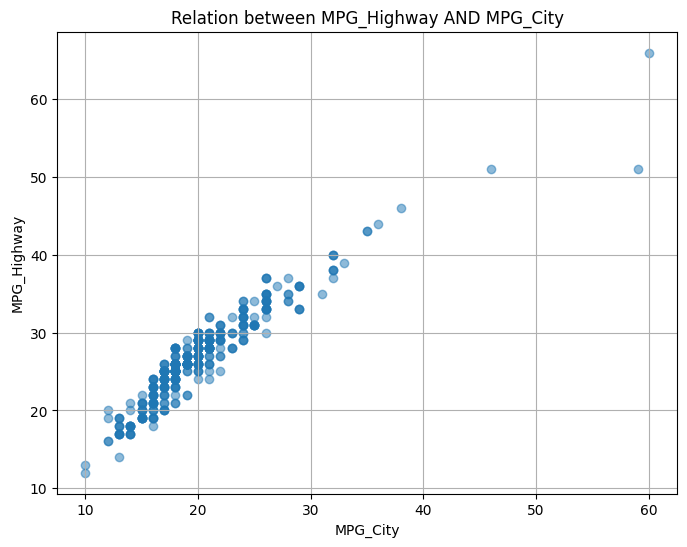

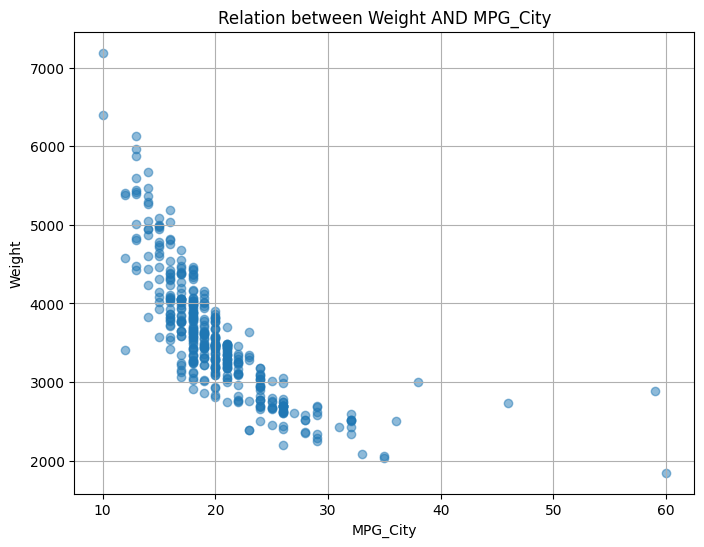

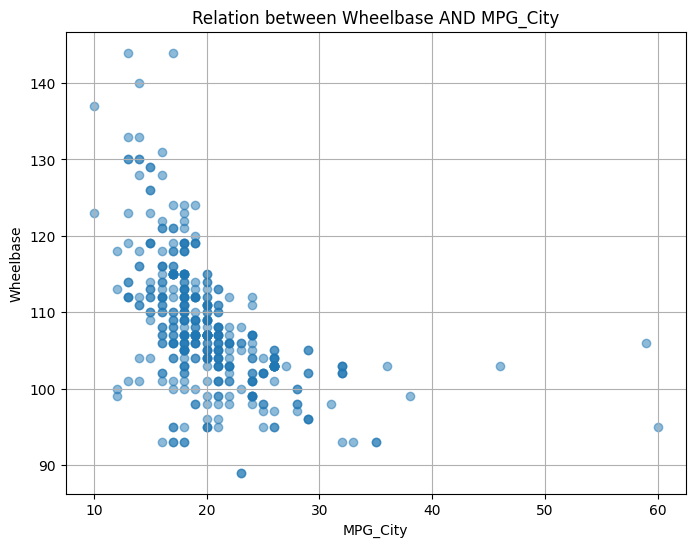

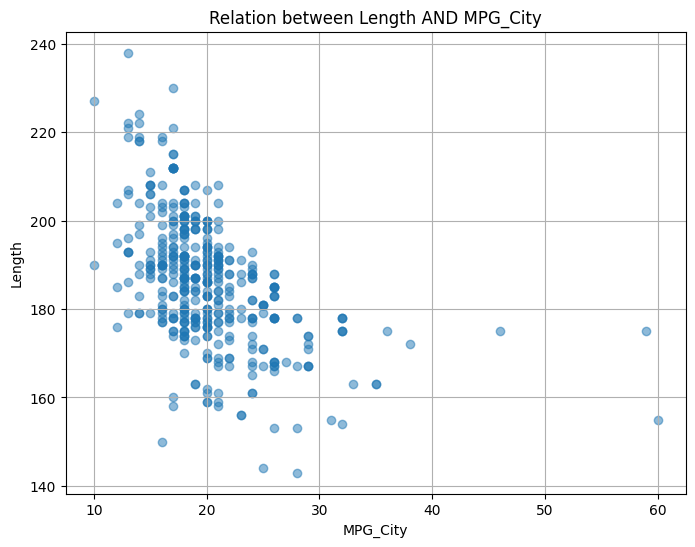

In [28]:
variablesToCompare = numericVariables.columns.to_list
graphScatter(numericVariables, selectedVariable)

### OBSERVATIONS:

#### MPG_City AND Invoice
- The higher the price of the car, the lower the MPG_City performance may be.

#### MPG_City AND EngineSize
- The larger the engine size, the lower the highway performance, the lower the MPG_City performance.

#### MPG_City AND Cylinders
- The greater the number of cylinders, the lower the MPG_City performance.

#### MPG_City AND Horsepower
- The lower the horsepower, the higher the MPG_City performance.

#### MPG_City AND MPG_Highway
- The relationship is almost 1 to 1, the more MPG_Highway performance the more MPG_City performance.

#### MPG_City AND Weight
- The higher the weight there is a slightly lower performance in MPG_City.

#### MPG_City AND Wheelbase
- The greater the distance between the tires there is a slightly lower performance in MPG_City, since the separated tires are usually for trucks.

#### MPG_City AND Length
- The larger the size, there is a slightly lower performance in MPG_City.


## 3. Correlation Matrix

### 3.1. Create the correlation matrix, which are the most important variables to explain the variability of MPG_City. Explain why the coefficient is negative or positive

In [29]:
pd.concat([numericVariables, df[selectedVariable]]).corr()

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Invoice,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


1. **Invoice (≈-0.47):** There is a moderate negative correlation between the price of the car (Invoice) and the mileage per gallon in the city (MPG_City). This means that more expensive vehicles could use more fuel in the city.

2. **EngineSize (≈-0.71):** There is a strong negative correlation between engine size (EngineSize) and city miles per gallon (MPG_City). This means that larger engines tend to use more fuel in the city.

3. **Cylinders (≈-0.68):** There is a strong negative correlation between the number of cylinders (Cylinders) and miles per gallon in the city (MPG_City). This is consistent with the previous observation because engines with more cylinders tend to be larger and consume more fuel.

4. **MPG_Highway (≈0.94):** There is a very strong positive correlation between highway miles per gallon (MPG_Highway) and city miles per gallon (MPG_City). This means that vehicles that are more efficient on the highway will also be more efficient in the city.

5. **Weight (≈-0.73):** There is a strong negative correlation between vehicle weight and city miles per gallon (MPG_City). This means that the more weight the vehicle has, the more gasoline it will use, therefore it will be less efficient in the city.

6. **Wheelbase (≈-0.50):** There is a moderate negative correlation between wheelbase (Wheelbase) and city miles per gallon (MPG_City). The further apart the tires are, the larger and heavier the vehicles can be, therefore they will be less efficient in the city.

7. **Length (≈-0.50):** Vehicle length (Length) shows a moderate negative correlation with city miles per gallon (MPG_City). This indicates that longer vehicles may perform less efficiently in the city.


### 3.2 Create dummy variables for all categorical variables and generate the correlation matrix again. What is the value of categorical variable with the highest correlation?

In [30]:
dummiesVariablees = pd.DataFrame(df[categoricalVariables.columns])
pd.get_dummies(dummiesVariablees[categoricalVariables.columns]).corr()

,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
Make_Acura,1.000000,-0.027792,-0.028549,-0.018898,-0.017796,-0.033459,-0.024574,-0.022822,-0.030729,-0.017796,...,0.027029,0.011490,-0.031428,-0.035402,0.168563,-0.081886,-0.093264,-0.022631,0.048108,-0.033684
Make_Audi,-0.027792,1.000000,-0.047720,-0.031589,-0.029746,-0.055927,-0.041076,-0.038147,-0.051363,-0.029746,...,0.031875,0.065012,-0.052533,0.029691,-0.164878,0.339401,-0.155891,0.218596,-0.068914,-0.126765
Make_BMW,-0.028549,-0.047720,1.000000,-0.032449,-0.030557,-0.057451,-0.042194,-0.039186,-0.052762,-0.030557,...,0.017199,0.059463,-0.053963,-0.017425,-0.169368,0.348644,-0.160137,0.018889,-0.234187,0.249780
Make_Buick,-0.018898,-0.031589,-0.032449,1.000000,-0.020227,-0.038030,-0.027931,-0.025940,-0.034926,-0.020227,...,0.049818,-0.052698,-0.035721,-0.040238,-0.112114,-0.093072,0.202632,-0.037048,0.105939,-0.086198
Make_Cadillac,-0.017796,-0.029746,-0.030557,-0.020227,1.000000,-0.035812,-0.026302,-0.024427,-0.032889,-0.019048,...,-0.031766,0.004557,0.041347,-0.037891,-0.105576,-0.087644,0.190816,-0.030222,0.026806,-0.002214
Make_Chevrolet,-0.033459,-0.055927,-0.057451,-0.038030,-0.035812,1.000000,-0.049452,-0.045926,-0.061837,-0.035812,...,-0.030138,-0.032934,0.145619,-0.033598,-0.198498,-0.164783,0.358760,-0.018804,0.072057,-0.064642
Make_Chrysler,-0.024574,-0.041076,-0.042194,-0.027931,-0.026302,-0.049452,1.000000,-0.033730,-0.045416,-0.026302,...,0.099547,-0.028622,-0.046450,-0.002558,-0.145786,-0.121024,0.263491,-0.099723,0.129273,-0.053937
Make_Dodge,-0.022822,-0.038147,-0.039186,-0.025940,-0.024427,-0.045926,-0.033730,1.000000,-0.042178,-0.024427,...,0.001175,-0.020880,0.134392,-0.048592,-0.135392,-0.112396,0.244705,-0.026328,0.003696,0.020528
Make_Ford,-0.030729,-0.051363,-0.052762,-0.034926,-0.032889,-0.061837,-0.045416,-0.042178,1.000000,-0.032889,...,-0.065482,0.011937,0.077024,0.015740,-0.182298,-0.151335,0.329481,-0.023808,-0.003007,0.025816
Make_GMC,-0.017796,-0.029746,-0.030557,-0.020227,-0.019048,-0.035812,-0.026302,-0.024427,-0.032889,1.000000,...,-0.137982,-0.049625,0.266304,-0.037891,-0.105576,-0.087644,0.190816,0.053771,-0.076867,0.037265


By eye, the highest correlation value is "Drivetrain front" with -0.622102

## 3.3 Create the correlation matrix again by removing all car models that were classified as an outlier. (You can use .query(‘Model in["MDX","TSX 4dr"]’). There is some variation in correlation

### Correlation matrix after filtering outliers

In [50]:
from scipy.odr import Model

numericFilteredColumns = df.query('Model in["MDX","TSX 4dr"]').select_dtypes(include=['float64', 'int64'])
new = numericFilteredColumns.corr()
numericFilteredColumns.corr()

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Invoice,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
EngineSize,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Cylinders,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Horsepower,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
MPG_City,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
MPG_Highway,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
Weight,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Wheelbase,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
Length,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0


### Correlation matrix before filtering outliers

In [49]:
numericVariables.corr()

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Invoice,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000
